In [28]:
import numpy as np
from scipy.linalg import null_space
from sympy import symbols, solve
import matplotlib.pyplot as plt
from numpy.linalg import eig

In [44]:
class Eigen:
    def __init__(self,size,l):
        self.size = size
        self.l = np.array(l, dtype=float)

    def find(self):
        if self.size==2:
            if self.l[0][1]==0 or self.l[1][0]:
                self.eigen_values = np.array([self.l[1][1],self.l[0][0]])

            coff = [1,-1 * (self.l[0][0]+self.l[1][1]) , self.l[0][0]*self.l[1][1] - self.l[1][0] * self.l[0][1]]

            self.eigen_values = np.roots(coff)
            self.eigen_vectors = []


            # --------------------------------------------------------------------------
            # it can't find the nullspace of the l - eigenvalue*I and the nullspace in 0 when the eigen values aren't Rational number

            for eigen_value in self.eigen_values:
                l1 = self.l.copy()
                l1[0][0] -= eigen_value
                l1[1][1] -= eigen_value
                self.eigen_vectors.append(null_space(l1))



            # --------------------------------------------------------------------------


        if self.size == 3:
            self.eigen_vectors = []
            
            coff = [1, self.l[0][0]*self.l[0][1], self.l[0][0]*self.l[1][1]*self.l[2][2] - self.l[0][0]*self.l[1][2]*self.l[2][1] - self.l[0][1]*self.l[1][0]*self.l[2][2] + self.l[0][1]*self.l[1][2]*self.l[2][0] + self.l[0][2]*self.l[1][0]*self.l[2][1] - self.l[0][2]*self.l[1][1]*self.l[2][0]]
            
            x = symbols('x')
            equation = ((self.l[0][0]-x)*(self.l[1][1]-x)*(self.l[2][2]-x)+(self.l[0][1]*self.l[2][0]*self.l[1][2])+(self.l[1][0]*self.l[2][1]*self.l[0][2]))-(((self.l[2][2]-x)*self.l[2][0]*self.l[0][2])+((self.l[0][0]-x)*self.l[1][2]*self.l[2][1])+((self.l[2][2]-x)*self.l[1][0]*self.l[0][1]))
            solution = solve(equation, x)
            self.eigen_values = [sol.evalf(chop=True) for sol in solution]
            self.eigen_vectors = []
            for eigen_value in self.eigen_values:
                l1 = self.l.copy()
                l1[0][0] -= eigen_value
                l1[1][1] -= eigen_value
                l1[2][2] -= eigen_value
                self.eigen_vectors.append(null_space(l1))

    def plot(self):
        fig, ax = plt.subplots()
        ax.scatter(0, 0, color='red')
        for i in range(len(self.eigen_vectors)):
            eigenvector = self.eigen_vectors[i] / np.linalg.norm(self.eigen_vectors[i])
            ax.quiver(0, 0, *eigenvector, color=random_color(256), angles='xy', scale_units='xy', scale=1, width=0.005, label=f"Eigenvalue {self.eigen_values[i]}")
            transformed_eigenvector = np.dot(self.l, eigenvector)
            ax.quiver(*eigenvector, *transformed_eigenvector, color='green', angles='xy', scale_units='xy', scale=1, width=0.0005, linewidth=0.5, edgecolor='black')
        ax.legend()
        ax.set_xlim(-2, 2)
        ax.set_ylim(-2, 2)

        plt.show()


    # for the Diagonalizing(Optional)
    def diagonalizing(self):
        eigenvalues, eigenvectors = eig(self.l)
        print('Eigenvalues:', eigenvalues)
        print('Eigenvectors:', eigenvectors)

        if eigenvalues.shape[0] == eigenvectors.shape[1]:

            D = np.diag(eigenvalues)
            P_inv = np.linalg.inv(eigenvectors)
            diagonalized_matrix = (eigenvectors , D , P_inv)
            return diagonalized_matrix
        else:
            print("Matrix is not diagonalizable.")
def random_color(n):
    return plt.colormaps['hsv'](np.random.randint(n))

[[ 6.  5.]
 [32.  4.]]
eigen values:
[17.68857754 -7.68857754]
eigen vectors:
[array([[-0.39329519],
       [-0.91941226]]), array([[ 0.34309636],
       [-0.93930021]])]


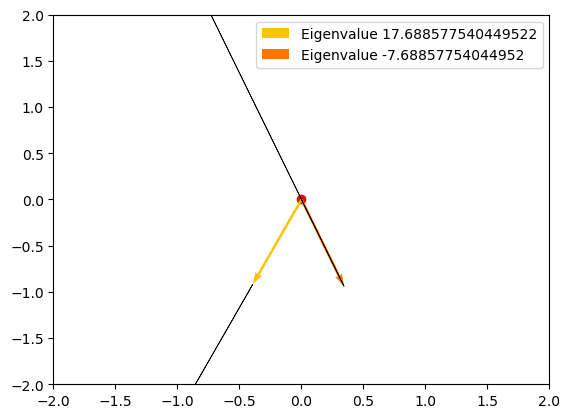

Diagonalization:
Eigenvalues: [17.68857754 -7.68857754]
Eigenvectors: [[ 0.39329519 -0.34309636]
 [ 0.91941226  0.93930021]]
(array([[ 0.39329519, -0.34309636],
       [ 0.91941226,  0.93930021]]), array([[17.68857754,  0.        ],
       [ 0.        , -7.68857754]]), array([[ 1.37150298,  0.50096622],
       [-1.34246392,  0.57426317]]))


In [45]:
eigen = Eigen(2,[[6,5],[32,4]])
print(eigen.l)
eigen.find()
print('eigen values:')
print(eigen.eigen_values)
print('eigen vectors:')
print(eigen.eigen_vectors)
eigen.plot()
print('Diagonalization:')
print(eigen.diagonalizing())

In [47]:
eigen = Eigen(3,[[1,2,3],[3,2,1],[2,1,3]])
print(eigen.l)
eigen.find()
print('eigen values:')
print(eigen.eigen_values)

[[1. 2. 3.]
 [3. 2. 1.]
 [2. 1. 3.]]
eigen values:
[-1.66807231097292, 1.85693369453373, 5.81113861643919]


In [48]:
def project(a,b):
    return np.array(a) * np.dot(a,b) / np.dot(a,a)

def plot(a,b,p):
    fig, ax = plt.subplots()

    ax.scatter(0, 0, color='red')
    ax.quiver(0, 0, *a, color=random_color(256), angles='xy', scale_units='xy', scale=1, width=0.005, label=f"a")
    ax.quiver(0, 0, *b, color=random_color(256), angles='xy', scale_units='xy', scale=1, width=0.005, label=f"b")
    transformed = p
    ax.quiver(0 , 0 , *transformed, color=random_color(256), angles='xy', scale_units='xy', scale=1, edgecolor='black',label='Projection')
    size = np.linalg.norm(p)
    ax.legend()
    ax.set_xlim(-2*size, 2*size)
    ax.set_ylim(-2*size, 2*size)

    plt.show()


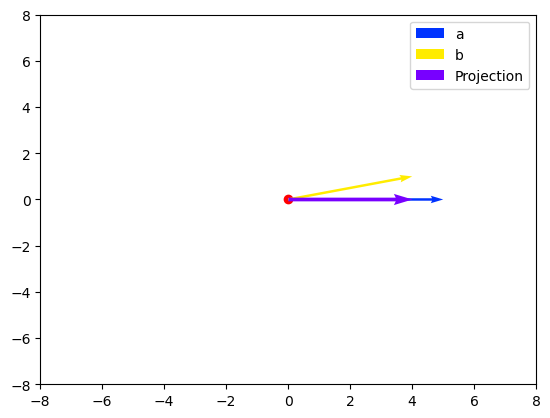

In [8]:
a = [5,0]
b = [4,1]
p = project(a,b)
plot(a,b,p)